**EDA**

Import libraries needed for the analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("new run")

**Load dataset**

In [2]:
url = "https://storage.googleapis.com/the_public_bucket/wine-clustering.csv"


In [3]:
wine_df = pd.read_csv(url)

**General exploration**

Exploration for visualizing our dataset, datatypes and statistics.

In [4]:
wine_df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wine_df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [7]:
wine_df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

**Visualizing boxplots**

In this section we are displaying the boxplot of each feature to visualy understand the distribution of the variables; their median, quartile 1, quartile 3, minimum and maximum value.

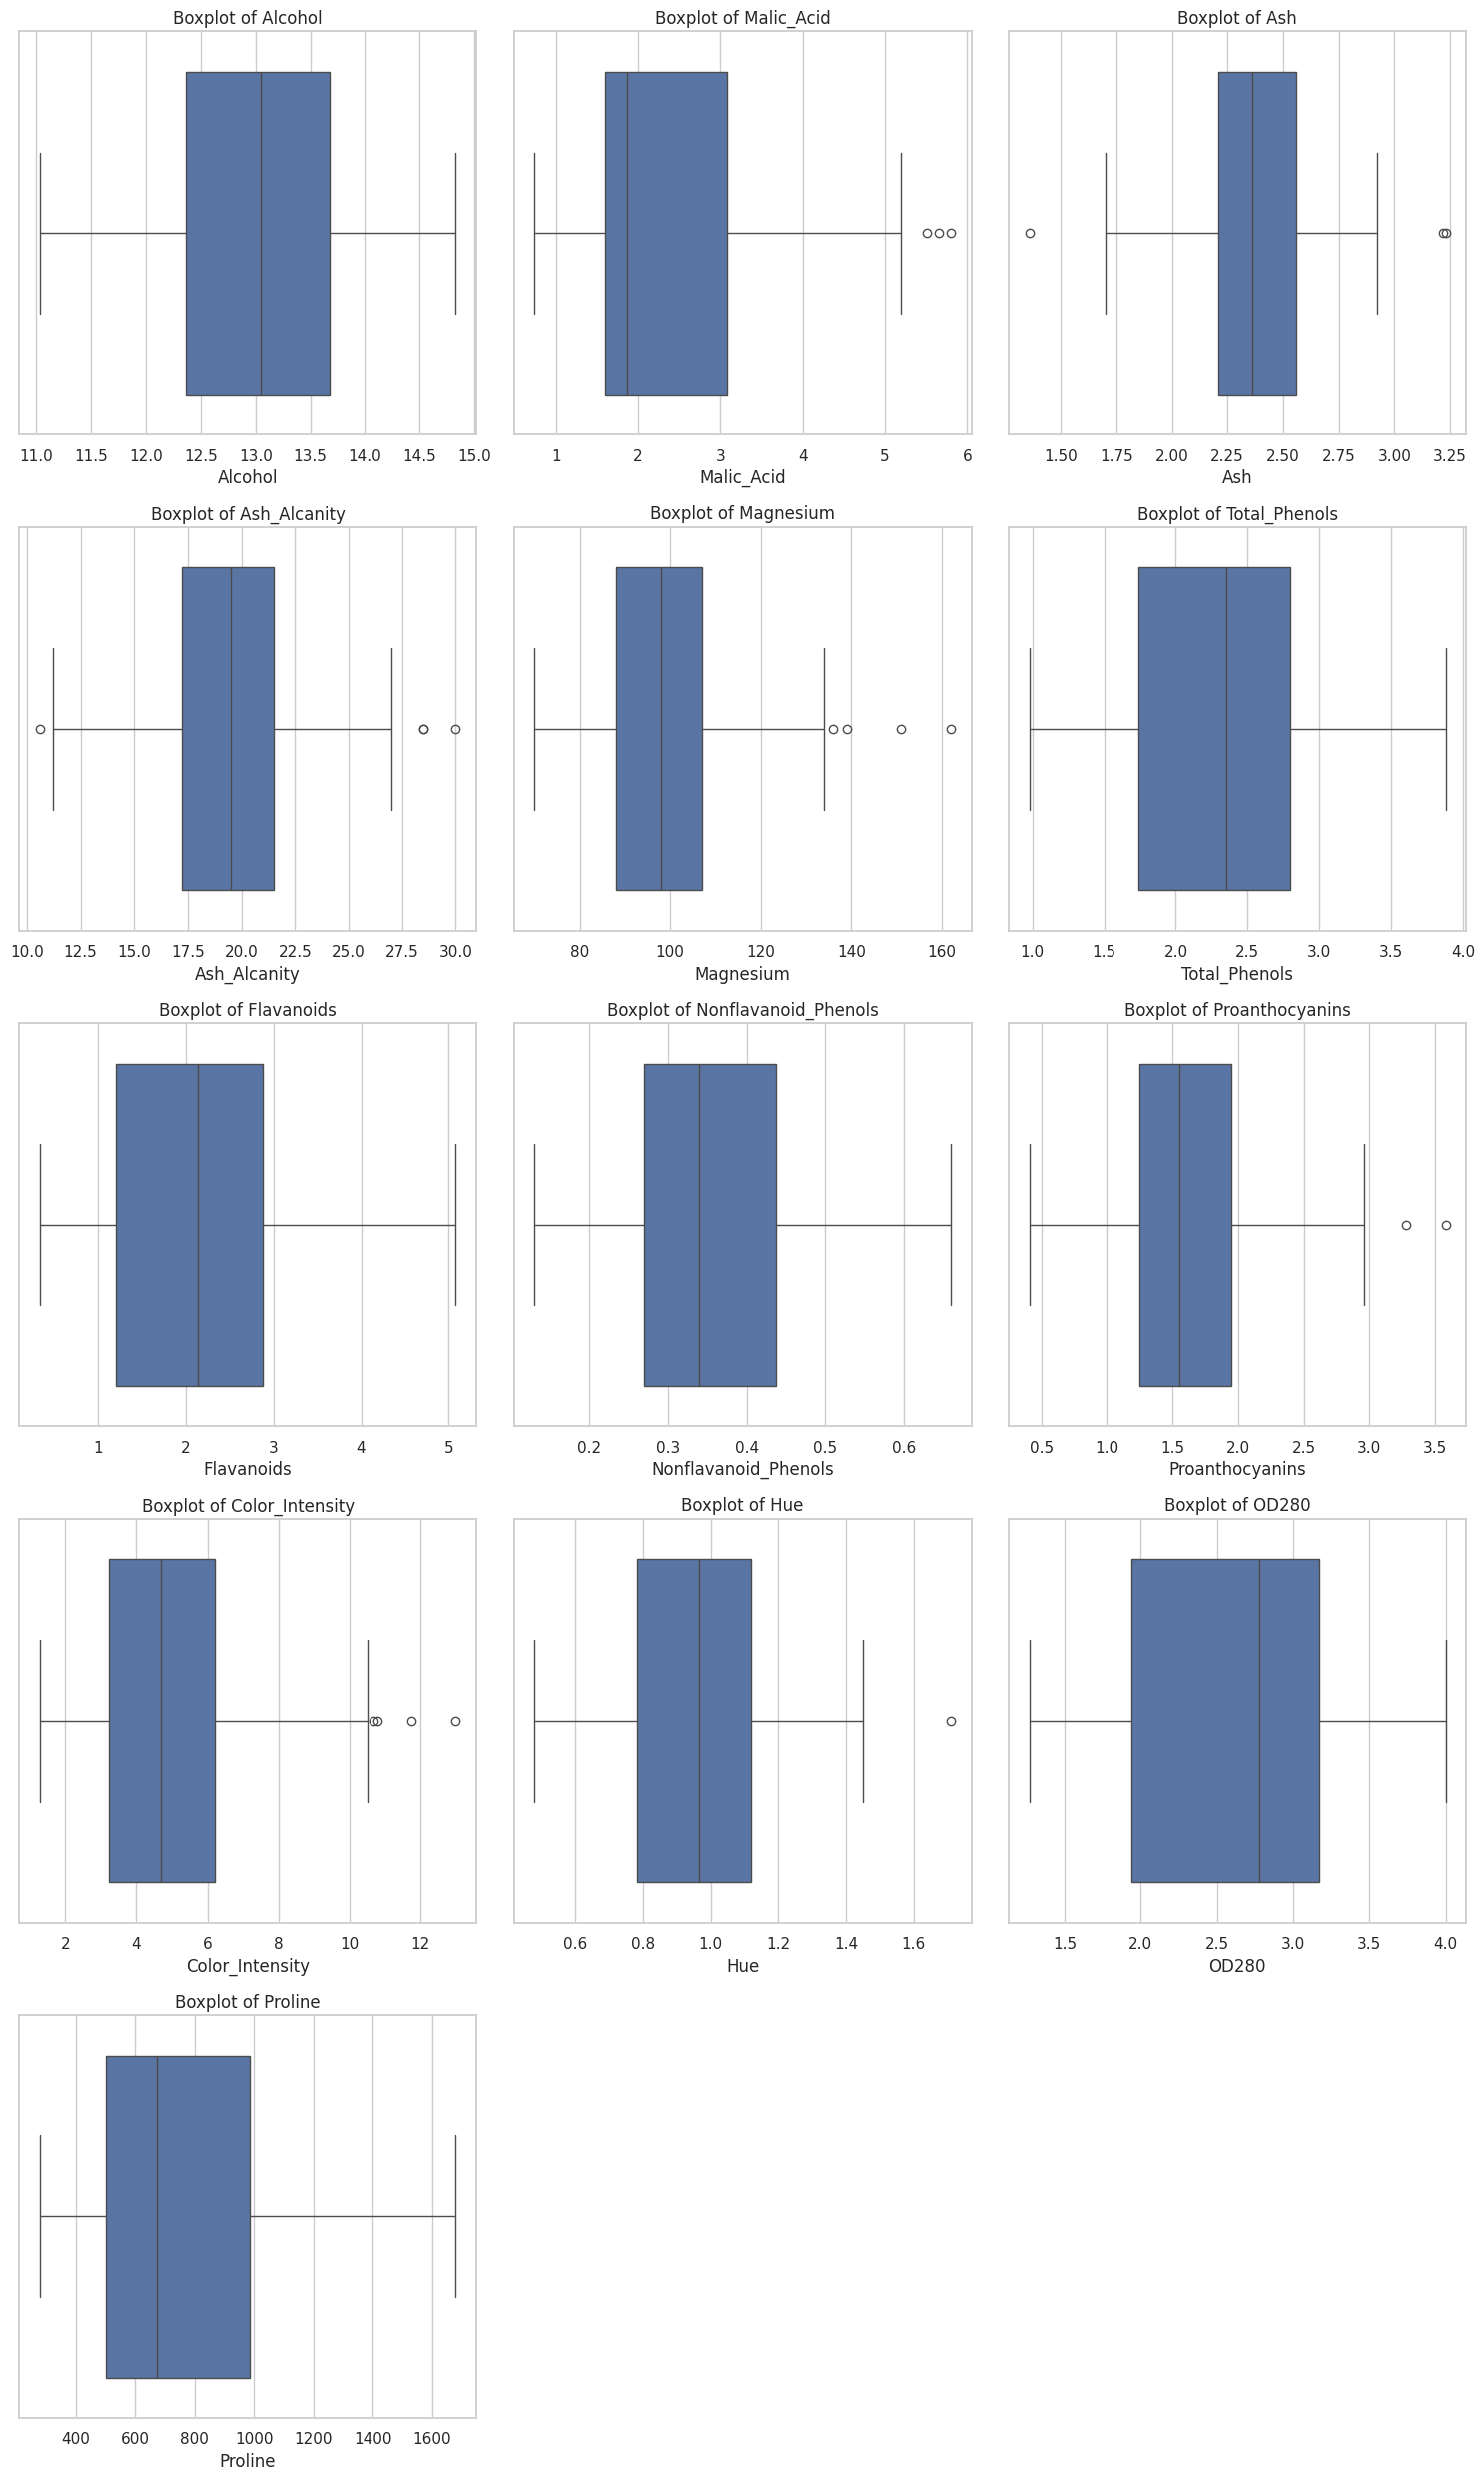

In [8]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Number of boxplots to display in each row
boxplots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(wine_df.columns) + boxplots_per_row - 1) // boxplots_per_row

# Create subplots in a grid
fig, axes = plt.subplots(nrows=num_rows, ncols=boxplots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through all columns and plot boxplots
for i, col in enumerate(wine_df.columns):
    sns.boxplot(x=wine_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots
for j in range(len(wine_df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


**Outliers**


> Boxplots are very useful for detecting outliers, we can see that the following features contain values outside the maximum or minimum whisker:

*   Malic_Acid
* Ash
* Ash_Alcanity
* Magnesium
* Proanthocyanins
* Color_Intensity
* Hue






**Distribution analysis**


Analyzing the distribution of our features holds significance as certain models rely on specific distributions. In the future, we may need to make decisions based on the characteristics of these distributions.

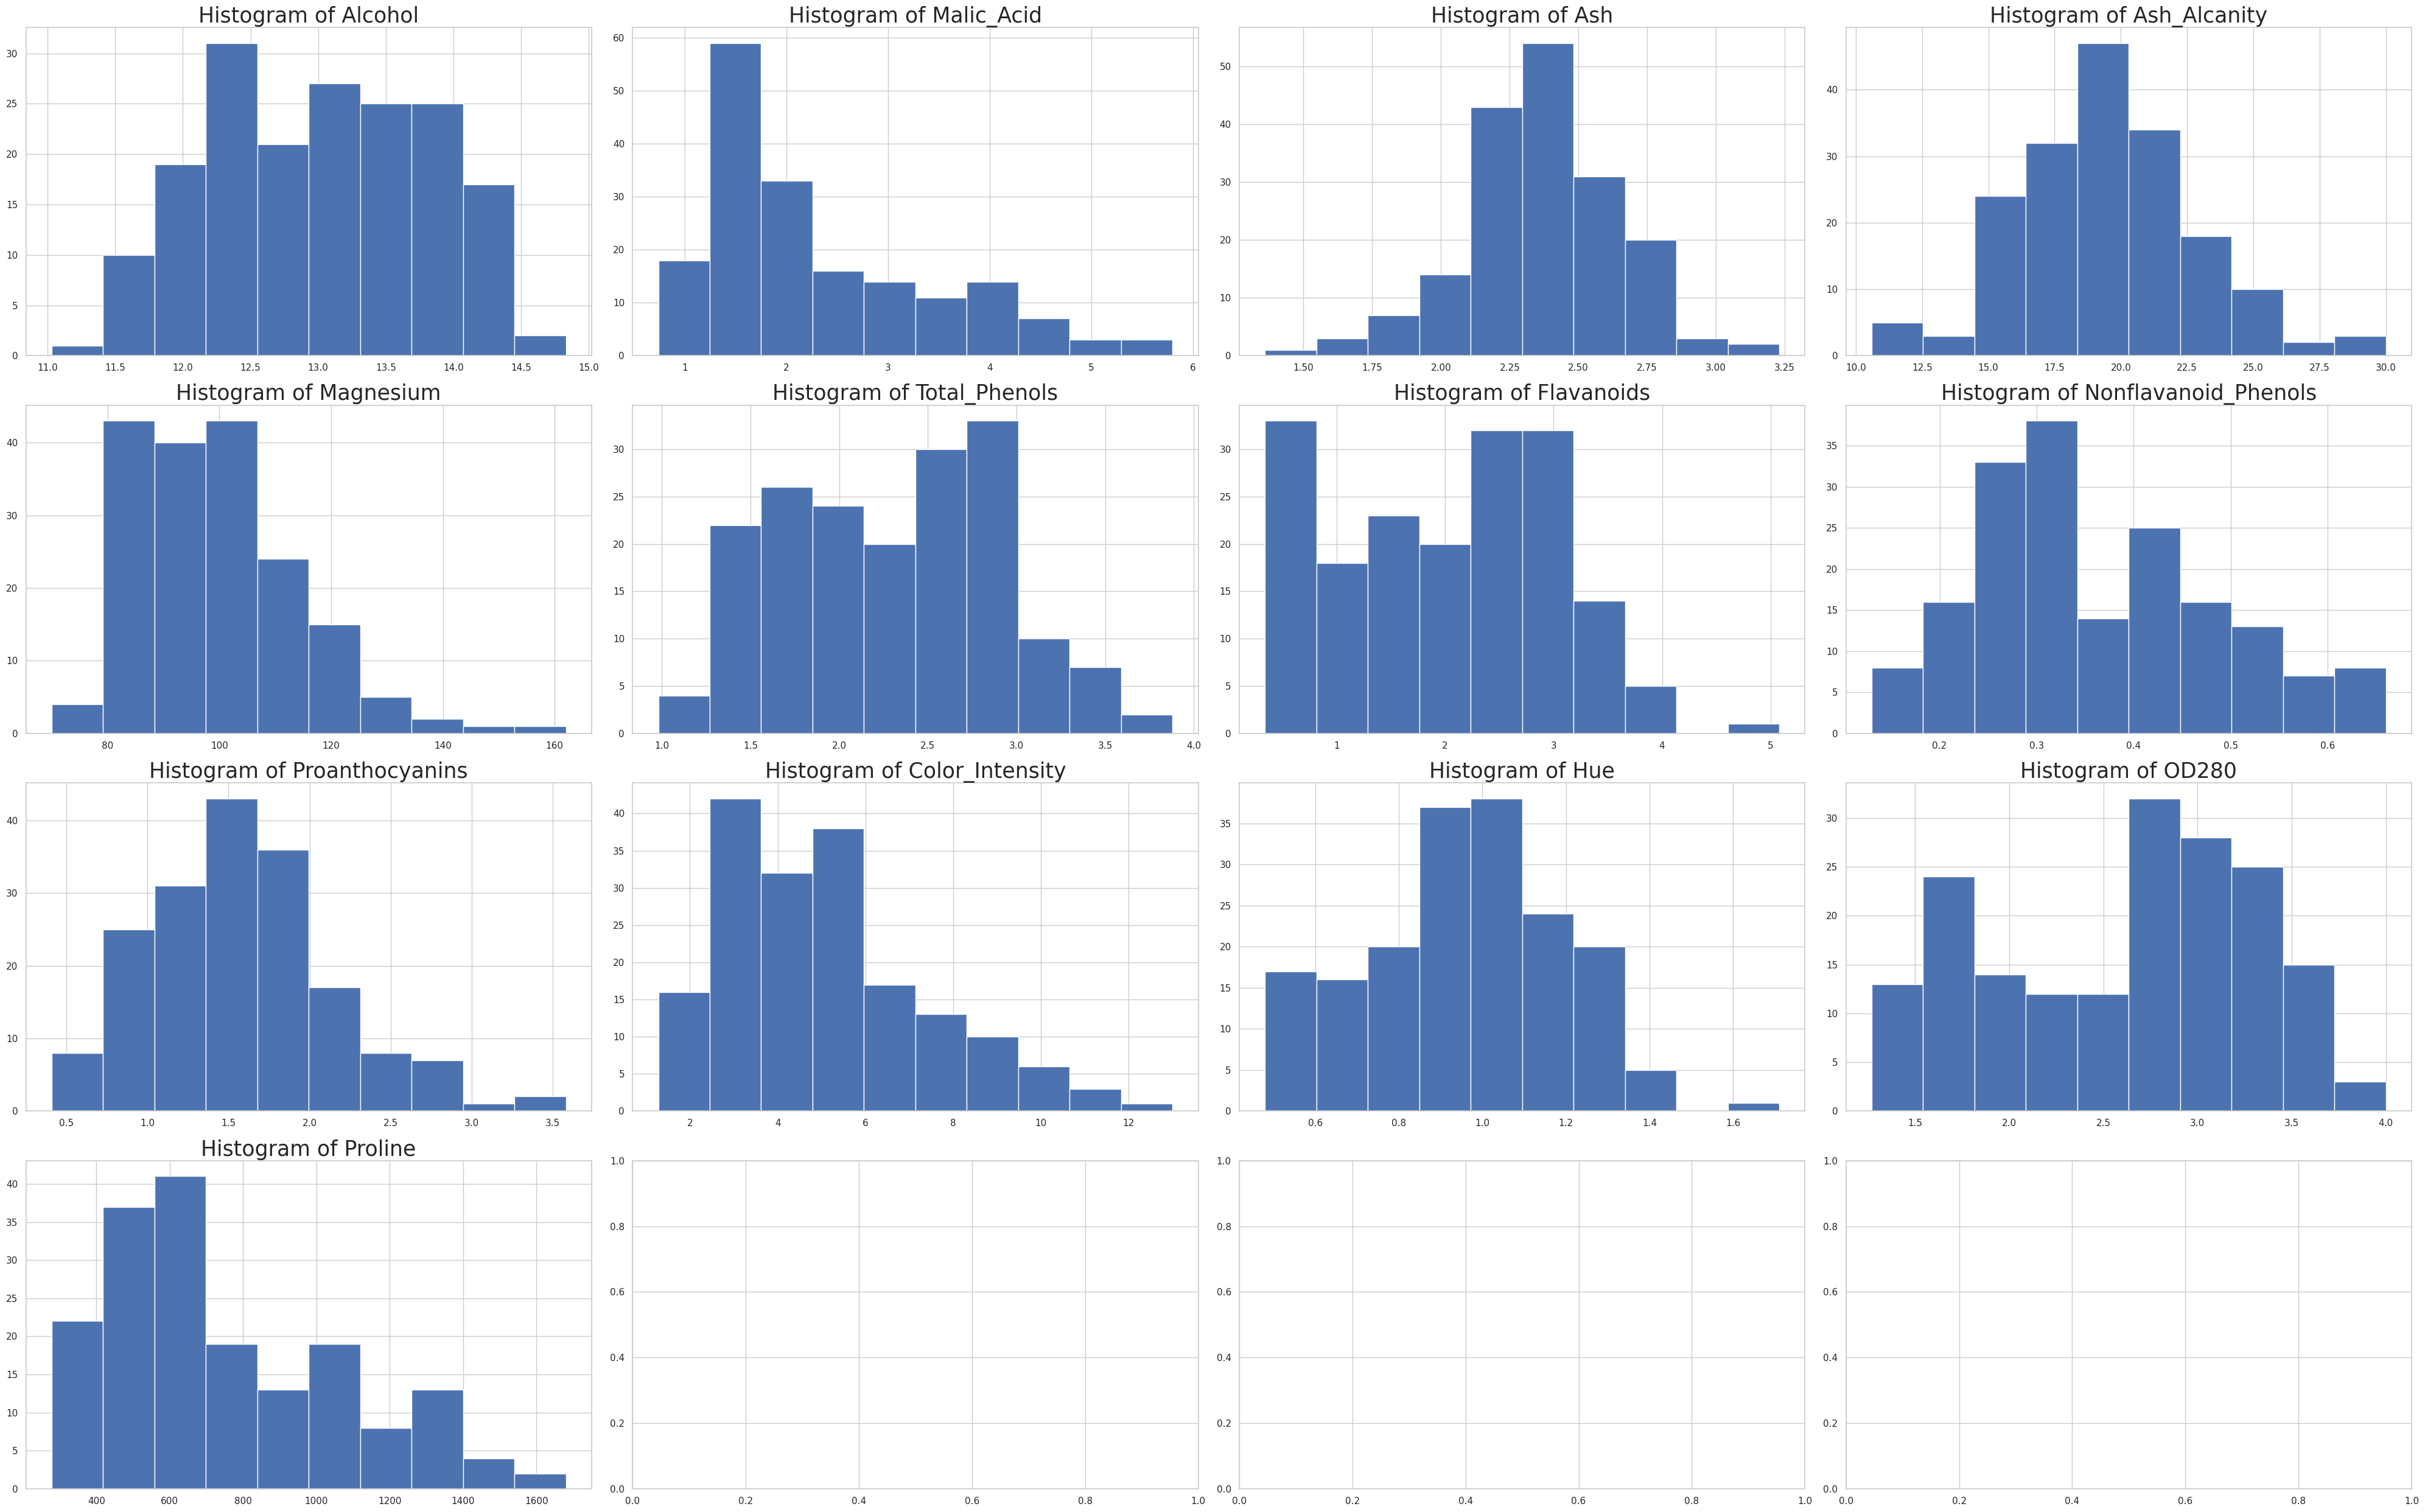

In [9]:
# Set a large figure size
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(40, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature in wine_df
for i, col in enumerate(wine_df.columns):
    wine_df[col].hist(ax=axes[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=25)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Correlation Analysis**

Correlation informs us about the degree of simultaneous change between two variables, and various methods exist for calculating it. In this instance, we will employ the Pearson method, which seeks linear correlations among the variables.

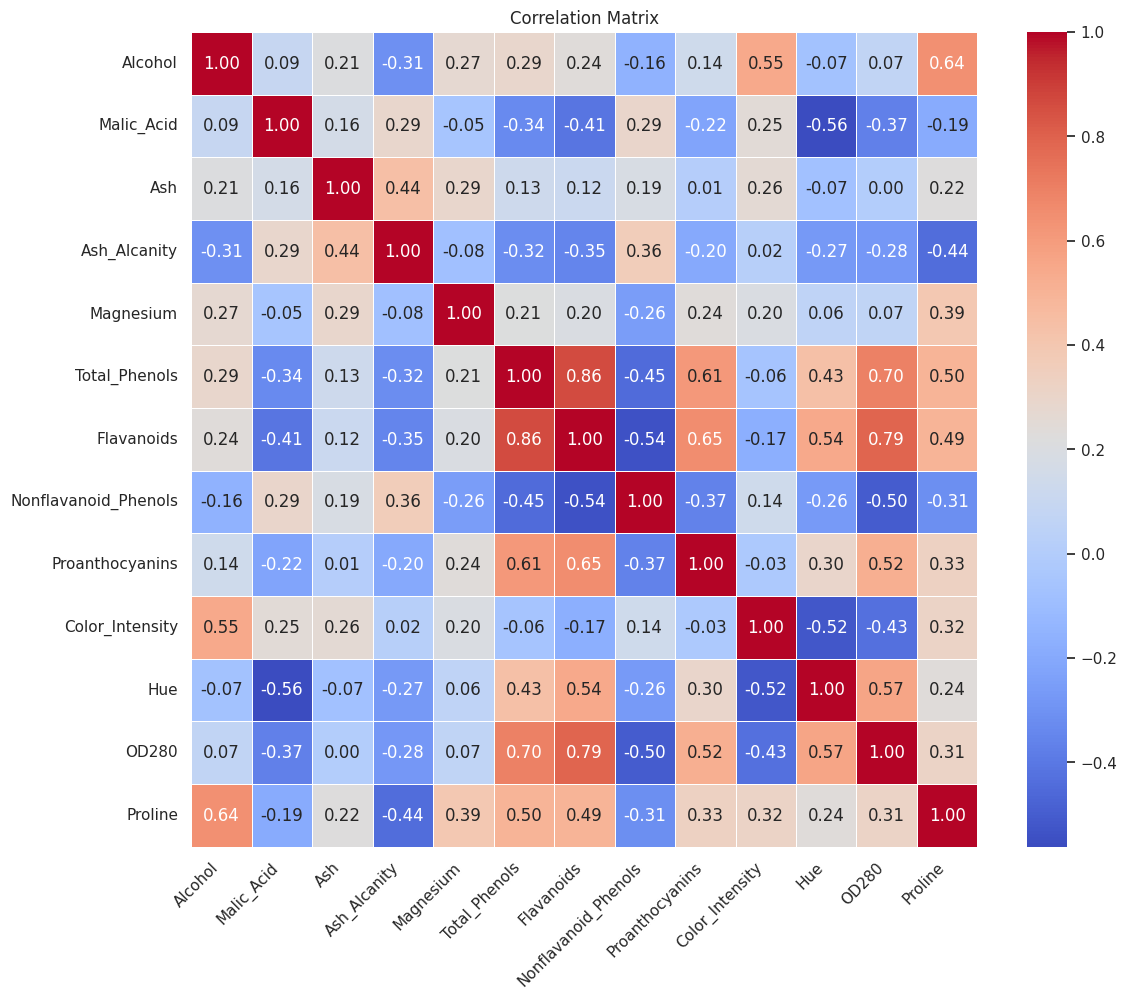

In [10]:
# Calculate correlation matrix
corr_matrix = wine_df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
# Rotate the tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutoff of labels
plt.tight_layout()
plt.title('Correlation Matrix')
plt.show()

**Conclusions**
Some of the most interesting correlations found in the matrix are the following:

The highest correlation is between Total_phenols and Flavonoids and it is also reflected in other correlations like OD280 and Proanthocyanins where both (Total_phenols and Flavonoids) have a high correlation with the other two features (OD280 and Proanthocyanins).

* **Total_phenols and Flavonoids very high: 0.86**



>
>


* Total_phenols and OD280 very high: 0.7
* Flavonoids and OD280 very high: 0.79


>
>


* Flavanoid and Proanthocyanins: 0.65
* Total_phenols and Proanthocyanins: 0.61

>
>


We can see that as per the prefix Non, flavanoid and non flavanoids have a negative correlation

* Flavanoid and non flavanoids: - 0.54

>
>

Hue refers to the scale of the color and we can also see Hue and Color intensity has a medium negative correlation
* Hue and Color intensity: -0.52
>
>

* Hue and OD280: 0.57

>
>

* Alcohol and Proline: 0.64




In this visualization, we are examining the correlation between all variables to observe their graphical behavior. Noticeably, highly correlated variables form a pattern resembling a linear shape.

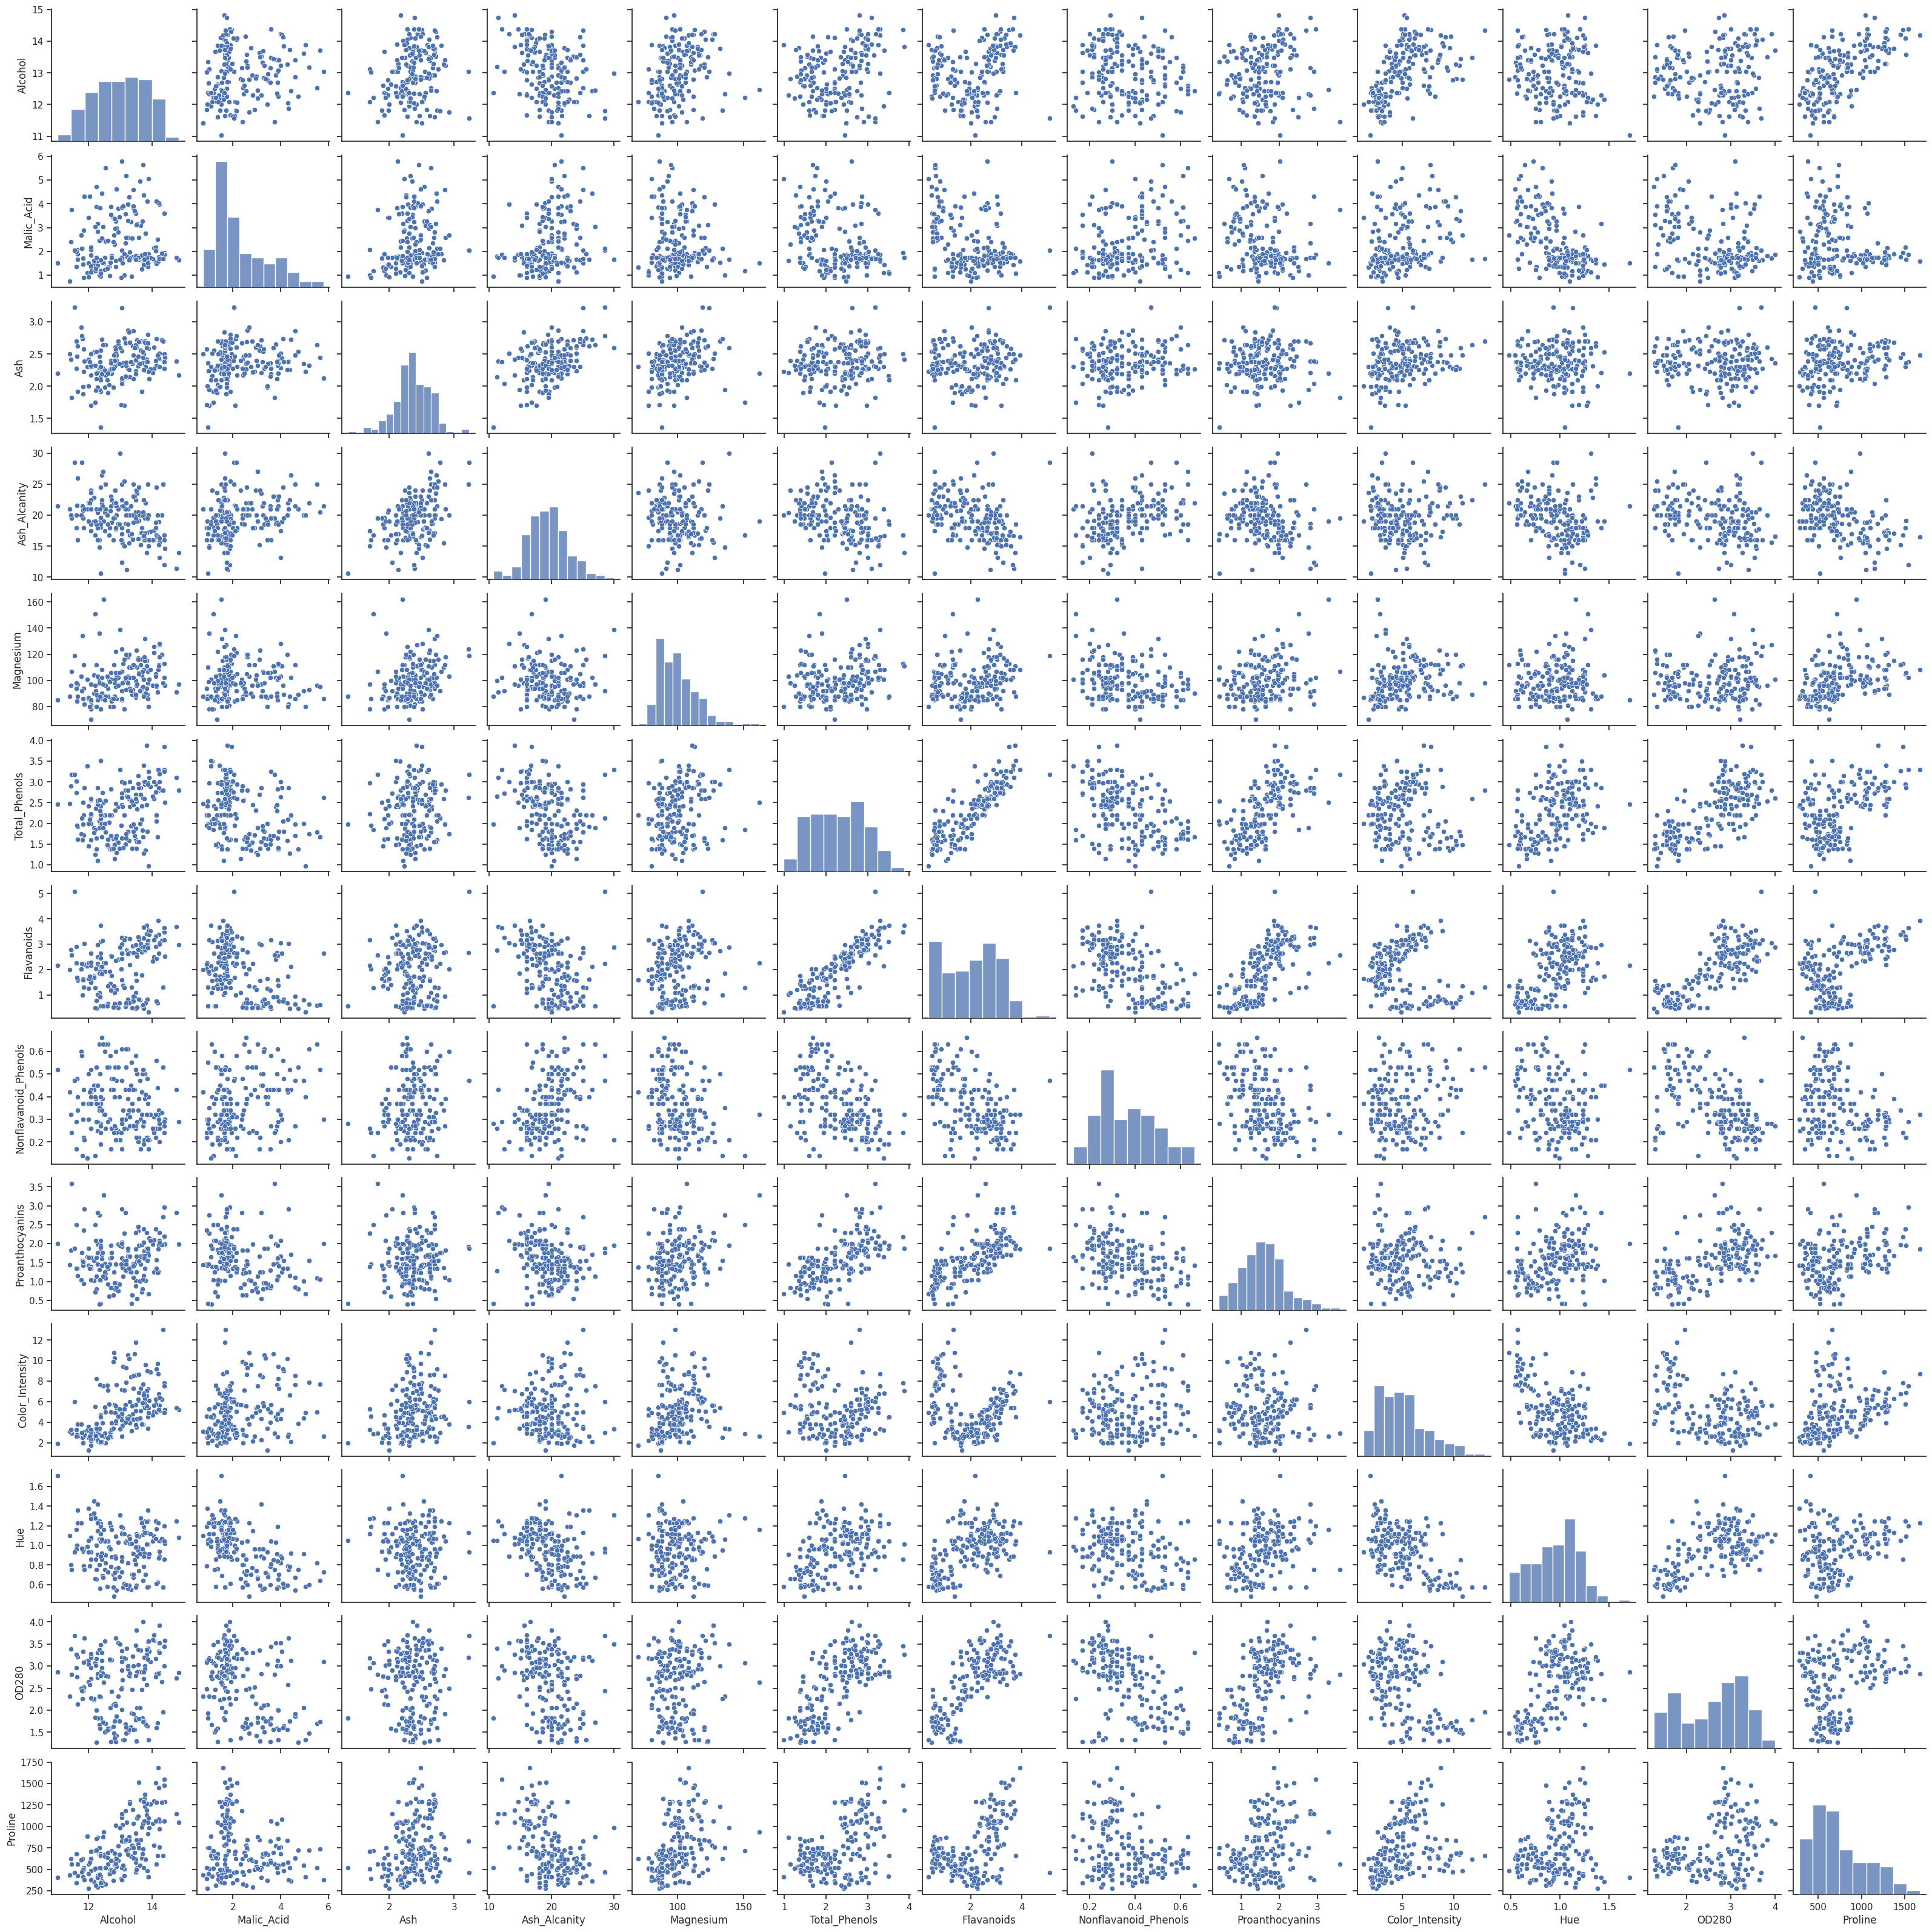

In [11]:
# Set the style of seaborn
sns.set(style="ticks")

# Create a pair plot
sns.pairplot(wine_df)

# Show the plot
plt.show()


To take a closer look, here we are printing the features with highest correlation and some other that are of interest:

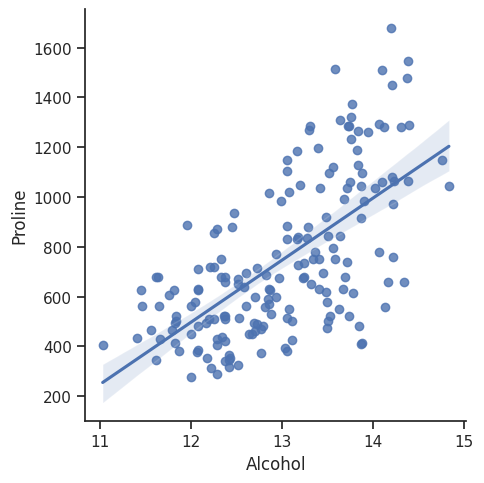

In [12]:
feature1 = "Alcohol"
feature2 = "Proline"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()


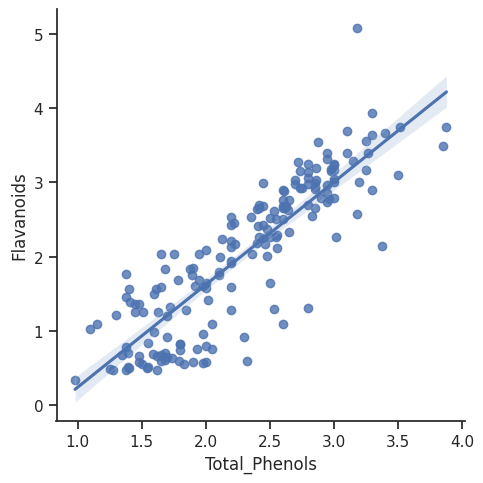

In [14]:
feature1 = "Total_Phenols"
feature2 = "Flavanoids"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()

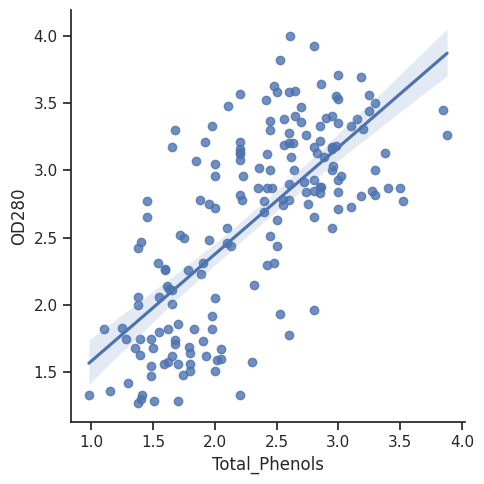

In [15]:
feature1 = "Total_Phenols"
feature2 = "OD280"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()

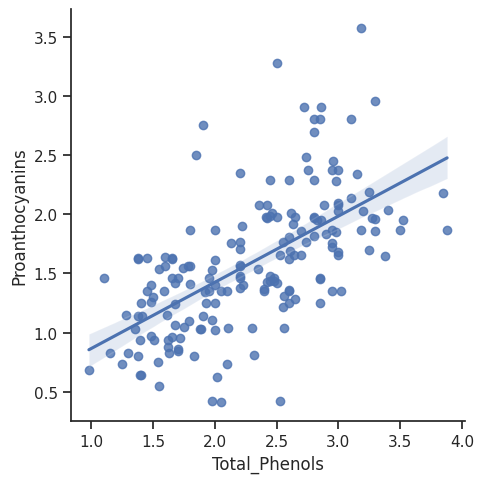

In [16]:
feature1 = "Total_Phenols"
feature2 = "Proanthocyanins"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()

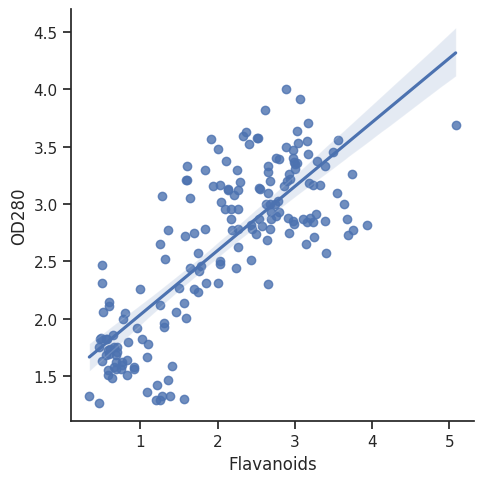

In [17]:
feature1 = "Flavanoids"
feature2 = "OD280"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()

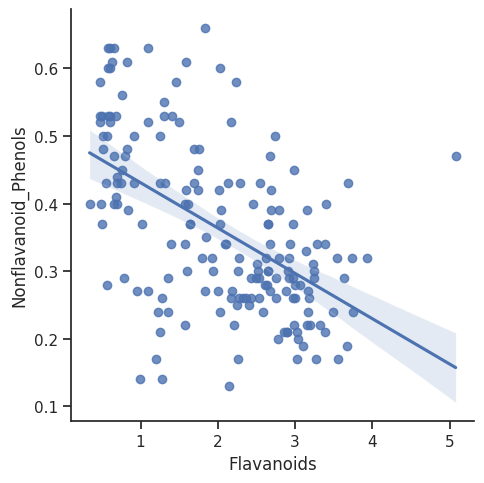

In [18]:
feature1 = "Flavanoids"
feature2 = "Nonflavanoid_Phenols"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()

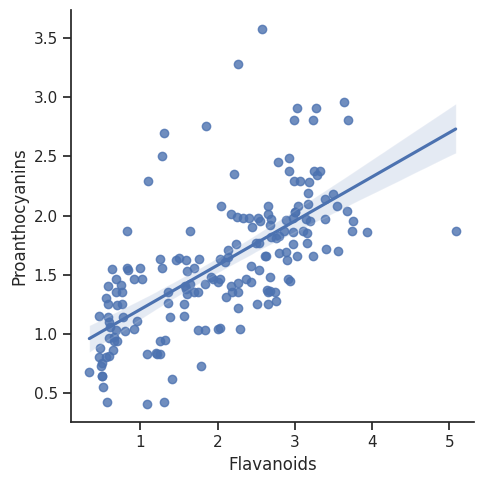

In [19]:
feature1 = "Flavanoids"
feature2 = "Proanthocyanins"

# Create a scatter plot with a linear regression line
sns.lmplot(x=feature1, y=feature2, data=wine_df)

# Show the plot
plt.show()

**Conclusiones**

The observation reveals a high correlation between Flavonoid and Total_phenols, suggesting a potential redundancy in the information they provide. Consideration might be given to imputing or omitting one of these variables to minimize variance in the learning process.

**Pre-processing**

Outliers detection

To identify outliers, we employ the interquartile range method, flagging values beyond 1.5 times the interquartile range. Subsequently, these outliers are imputed with the median of the respective column.

In [20]:
# List of continuous columns where you want to detect outliers
continuous_columns = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue']

# Dictionary to store outliers for each column
outliers_dict = {}

# Iterate through continuous columns
for column in continuous_columns:
    # Calculate IQR for the current column
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define a range for outliers (e.g., 1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the current column
    outliers = (wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)

    # Store the outliers in the dictionary
    outliers_dict[column] = outliers

# Convert the dictionary to a DataFrame
outliers_df = pd.DataFrame(outliers_dict)

# Display the DataFrame of outliers
print(outliers_df)

     Malic_Acid    Ash  Ash_Alcanity  Magnesium  Proanthocyanins  \
0         False  False         False      False            False   
1         False  False         False      False            False   
2         False  False         False      False            False   
3         False  False         False      False            False   
4         False  False         False      False            False   
..          ...    ...           ...        ...              ...   
173        True  False         False      False            False   
174       False  False         False      False            False   
175       False  False         False      False            False   
176       False  False         False      False            False   
177       False  False         False      False            False   

     Color_Intensity    Hue  
0              False  False  
1              False  False  
2              False  False  
3              False  False  
4              False  False  
.. 

In [21]:
# Iterate through continuous columns
for column in continuous_columns:
    # Calculate the median for the current column
    median_value = wine_df[column].median()

    # Impute outliers in the current column with the median
    wine_df[column][outliers_df[column]] = median_value

<ipython-input-21-ea70ea683b79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df[column][outliers_df[column]] = median_value
<ipython-input-21-ea70ea683b79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df[column][outliers_df[column]] = median_value
<ipython-input-21-ea70ea683b79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df[column][outliers_df[column]] = median_value
<ipython-input-21-ea70ea683b79>:7: Setti

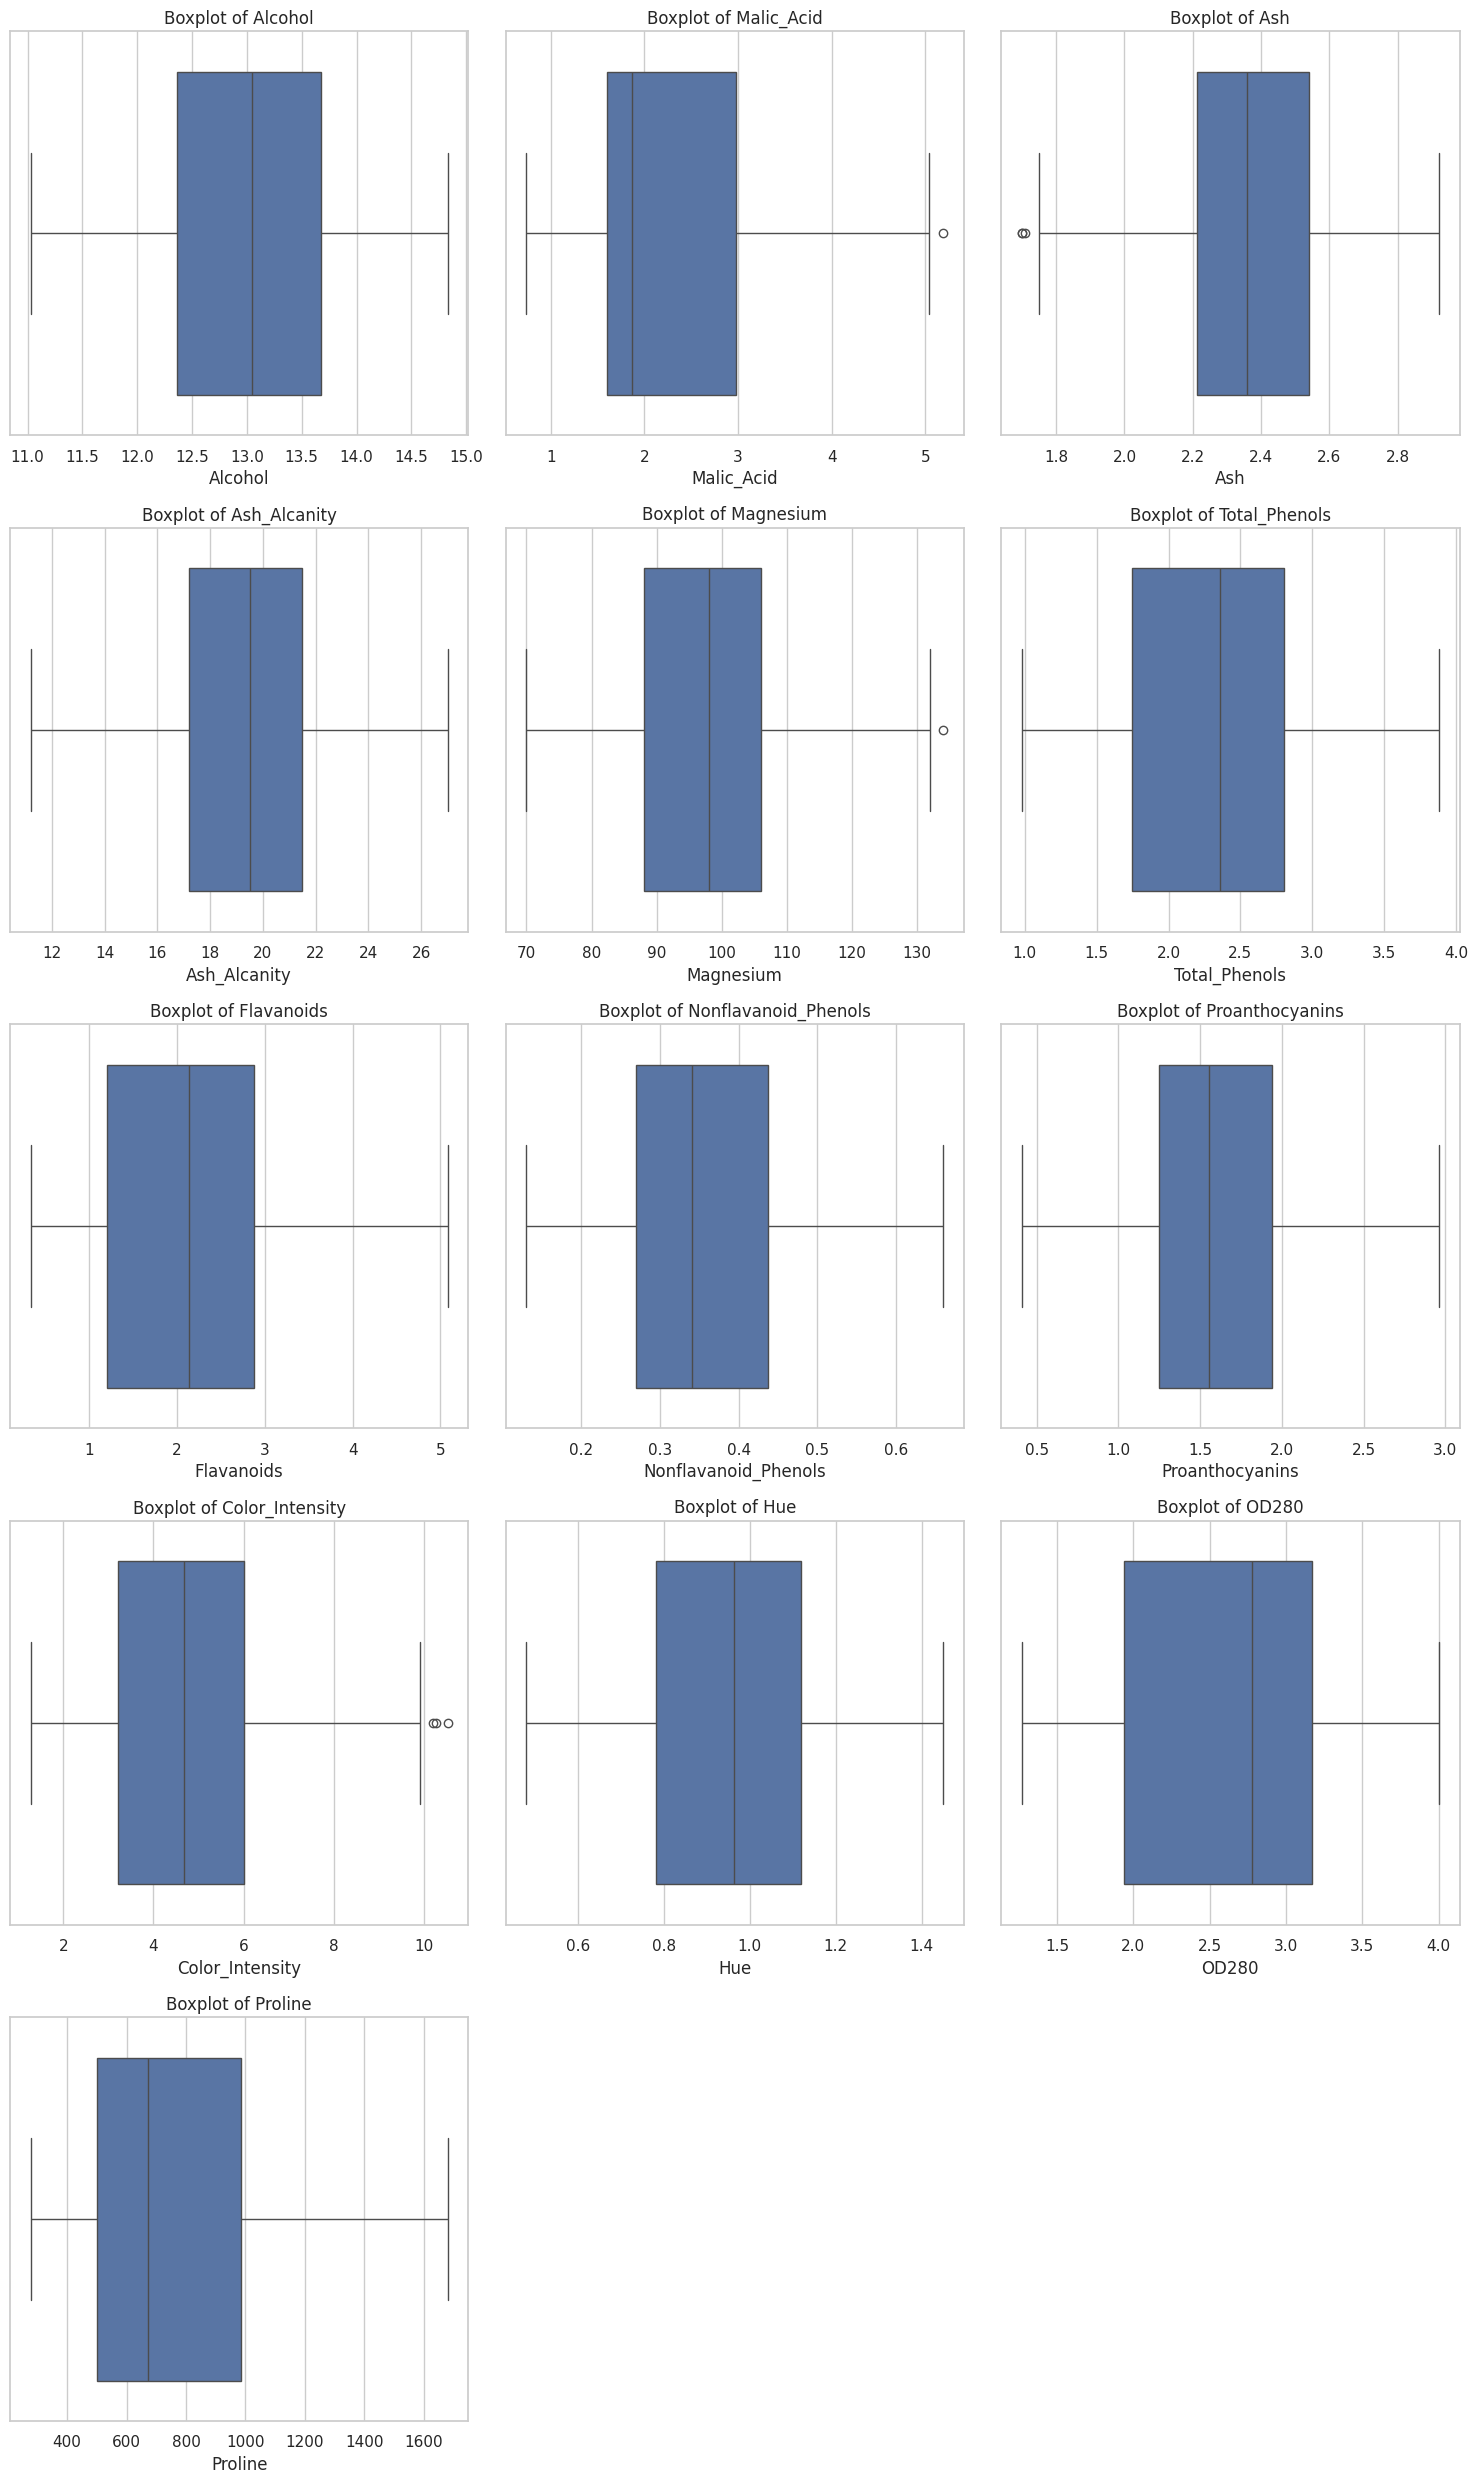

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Number of boxplots to display in each row
boxplots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(wine_df.columns) + boxplots_per_row - 1) // boxplots_per_row

# Create subplots in a grid
fig, axes = plt.subplots(nrows=num_rows, ncols=boxplots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through all columns and plot boxplots
for i, col in enumerate(wine_df.columns):
    sns.boxplot(x=wine_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots
for j in range(len(wine_df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**Normalization**

For using K-means we will need to standarize the data and unskew it.

In [23]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [24]:
# Unskew the data
datamart_log = np.log(wine_df)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=wine_df.index, columns=wine_df.columns)

In [25]:
datamart_normalized.describe()

Alcohol    Malic_Acid           Ash  Ash_Alcanity     Magnesium  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -5.189357e-16 -3.991813e-17 -1.000448e-15 -1.157626e-15  2.195497e-15   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.595596e+00 -2.388279e+00 -3.008617e+00 -3.332745e+00 -2.751429e+00   
25%   -7.730879e-01 -5.922721e-01 -5.573264e-01 -6.652657e-01 -8.746467e-01   
50%    9.176161e-02 -2.427769e-01  4.309718e-02  1.151202e-01  8.056933e-03   
75%    8.422492e-01  8.516420e-01  7.268951e-01  7.222326e-01  6.516206e-01   
max    2.135038e+00  2.139332e+00  2.023924e+00  2.138585e+00  2.573994e+00   

       Total_Phenols    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count   1.780000e+02  1.780000e+02          1.780000e+02     1.780000e+02   
mean   -2.794269e-16  7.983626e-17         -1.596725e-16    -5.987720e-17   
std     1.002821e+00  1.002821e+00          1.002821e+00     1.002821e+00   
min    -2.825560e+00 -2.619853e+00         -2.724743e+00    -3.343676e+00   
25%    -8.215358e-01 -5.797353e-01         -6.570736e-01    -4.238994e-01   
50%     2.273472e-01  3.425765e-01         -4.925647e-03     1.437469e-01   
75%     8.300337e-01  8.224028e-01          7.082098e-01     7.306876e-01   
max     1.965952e+00  1.740286e+00          1.871524e+00     1.834006e+00   

       Color_Intensity           Hue         OD280       Proline  
count     1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  
mean      2.744372e-16 -3.991813e-17  7.983626e-17 -4.191404e-15  
std       1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  
min      -2.864076e+00 -2.648016e+00 -2.257597e+00 -2.180711e+00  
25%      -7.520192e-01 -6.779080e-01 -8.531398e-01 -7.602486e-01  
50%       1.065303e-01  1.567986e-01  3.475302e-01 -4.304315e-02  
75%       6.729330e-01  7.677683e-01  7.840733e-01  8.753434e-01  
max       1.958516e+00  1.808813e+00  1.557407e+00  2.165164e+00

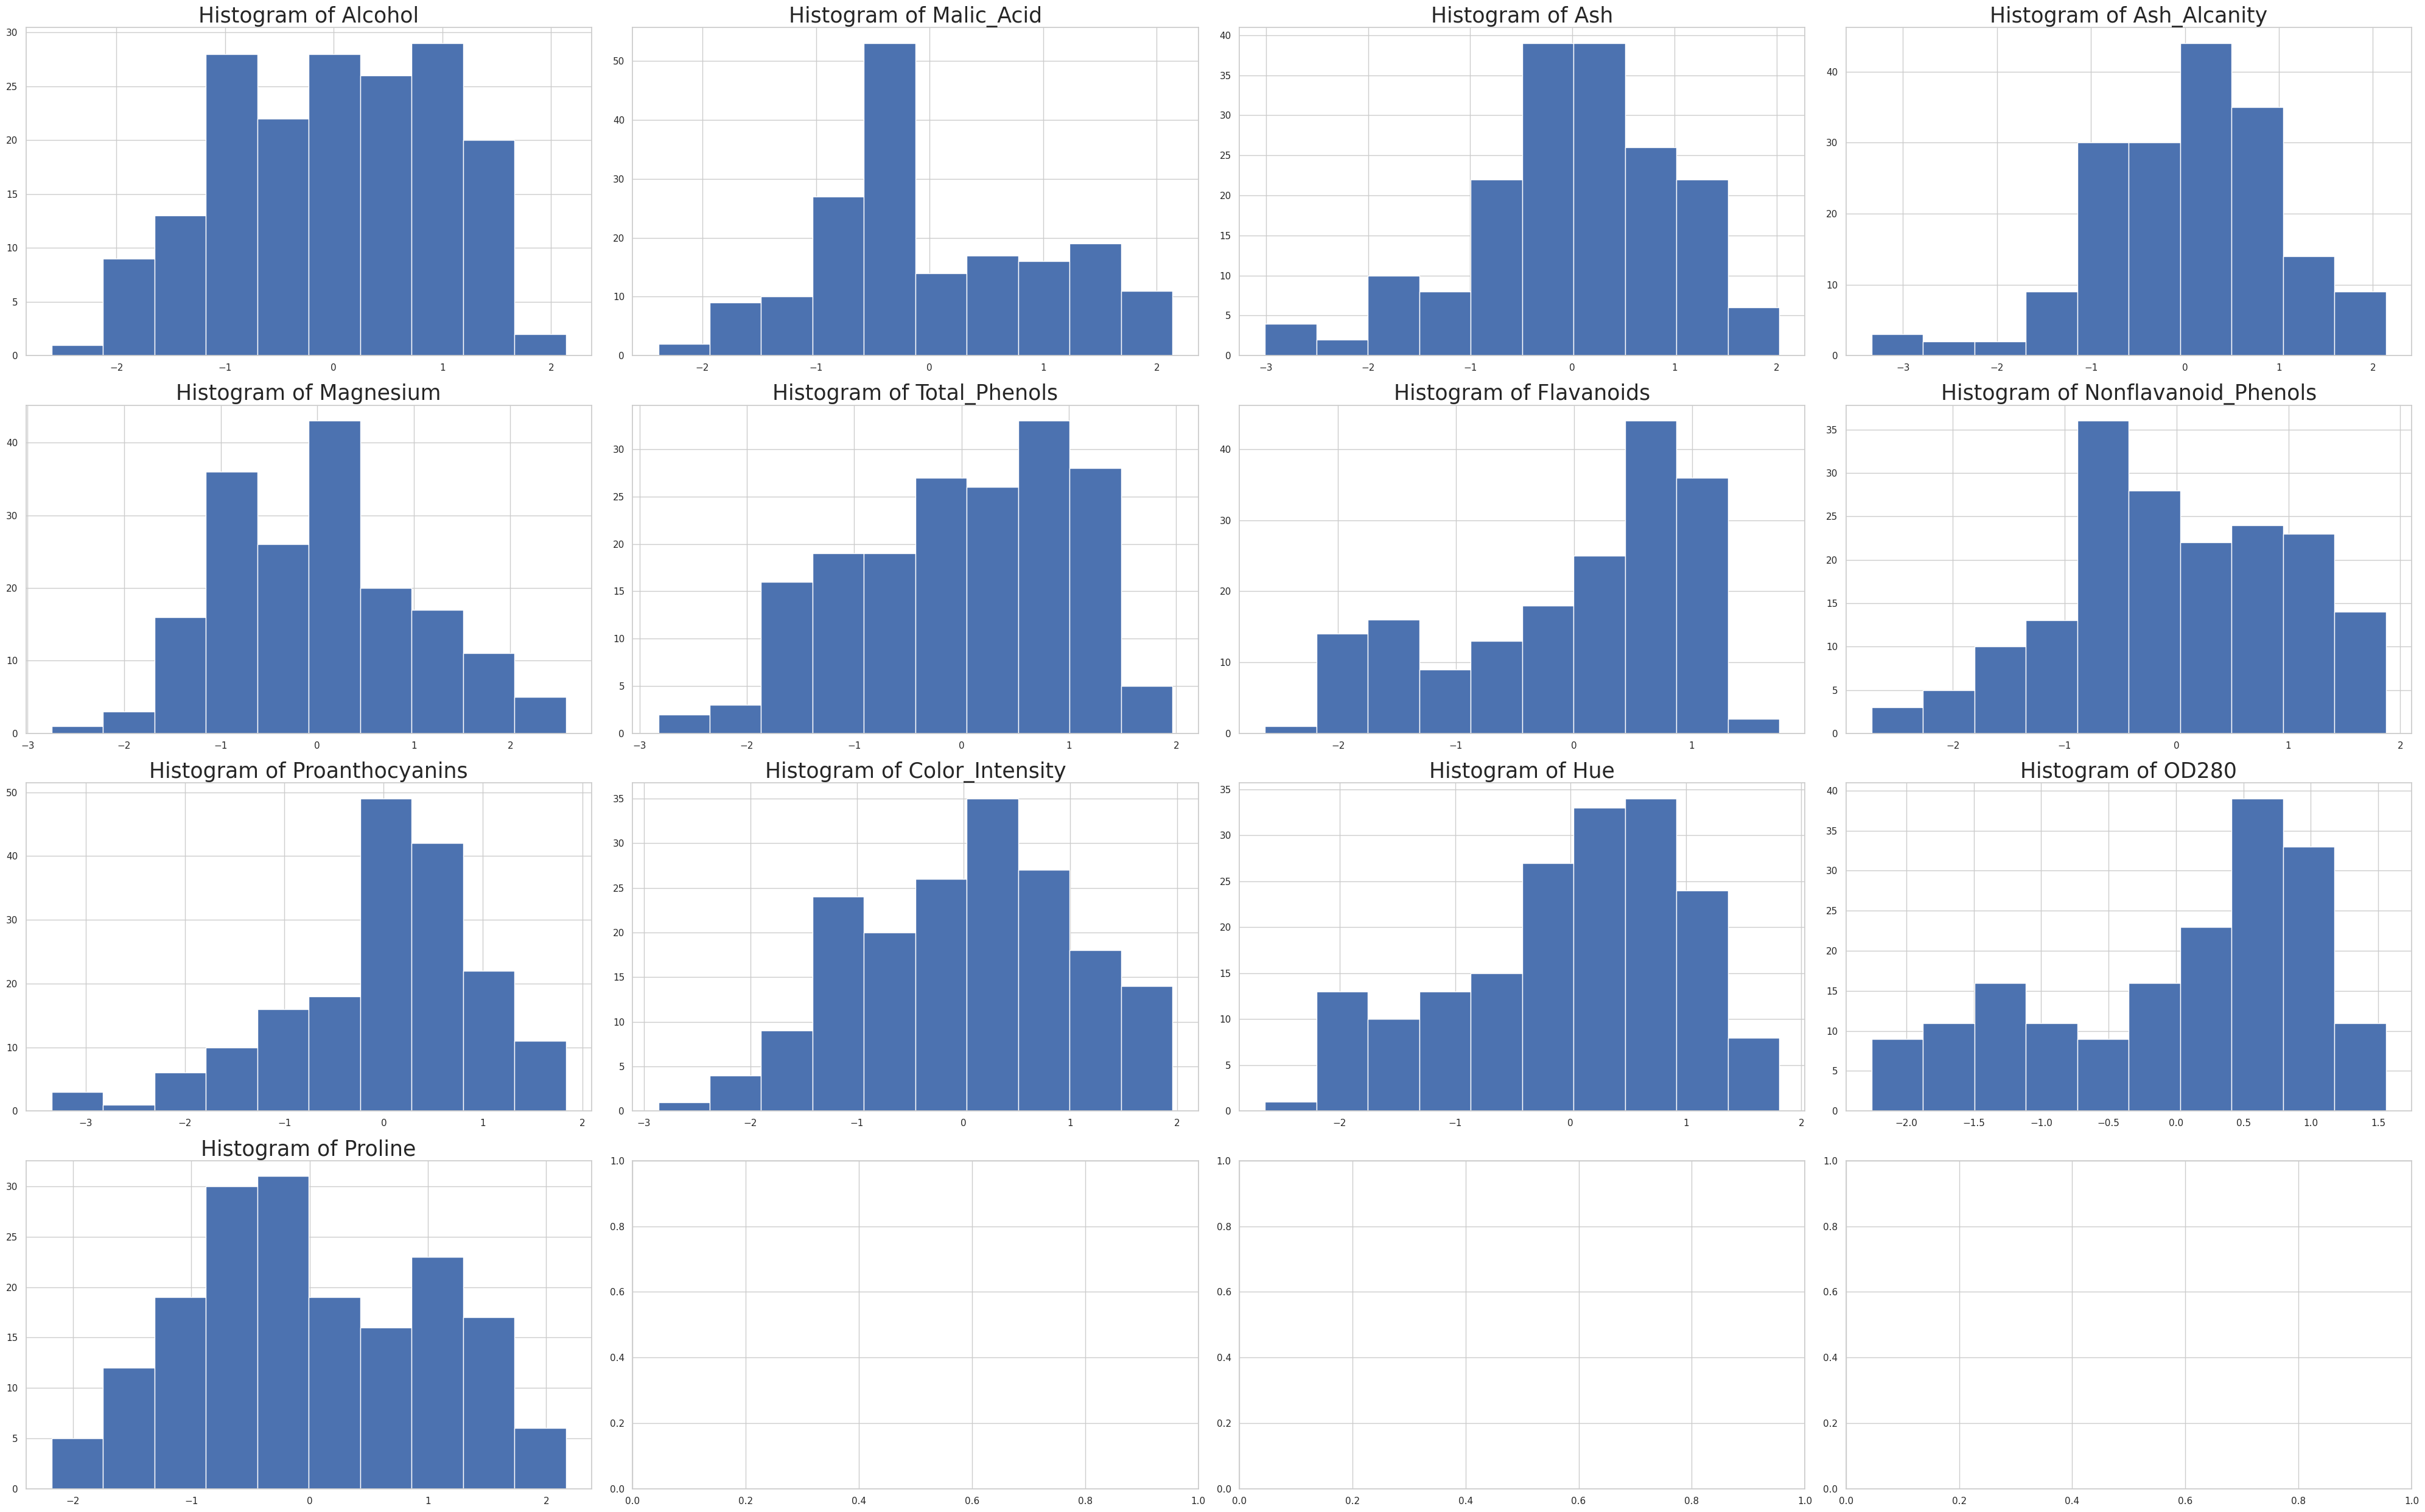

In [26]:

# Set a large figure size
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(40, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature in wine_df
for i, col in enumerate(datamart_normalized.columns):
    datamart_normalized[col].hist(ax=axes[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=25)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Modeling**

For doing our clustering model we will start with K-Means method.

K-means is a clustering algorithm that groups data points into clusters based on similarity, with the goal of minimizing the sum of squared distances within each cluster.

In [27]:
# Import KMeans
from sklearn.cluster import KMeans

Let's generate various models with different cluster numbers and compute their sum of squared errors to identify the optimal value for K.




In [28]:
sse = {}
for k in range(1, 15):

    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)

    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Here, we are using the Elbow Method.


The elbow method helps find the best number of clusters in K-means by plotting the sum of squared errors against different cluster numbers and identifying the point where the reduction in error starts to diminish, resembling an "elbow" in the graph. In this specific case our Elbow is between 3 and 4.

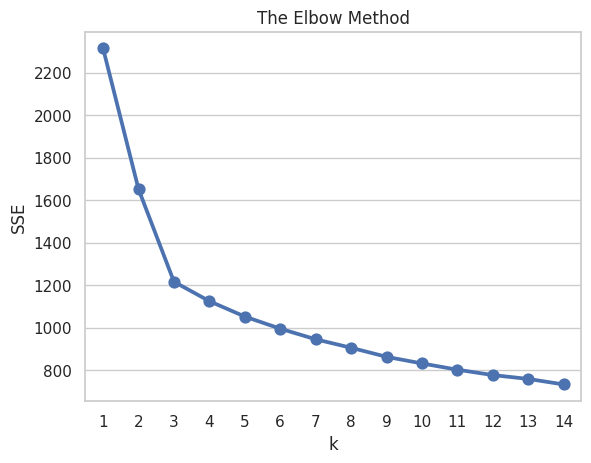

In [29]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Lets create our model with 3 clusters

In [30]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In the following code we will agregate the mean values for each feature per cluster. Providing insights into how the clusters differ in terms of these features.

In [31]:
# Create a DataFrame by adding a new cluster label column
datamart_wine_k3 = wine_df.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_wine_k3.groupby(['Cluster'])

# Calculate average features values and segment sizes per cluster value
grouped.agg({
    'Alcohol': 'mean',
    'Malic_Acid': 'mean',
    'Ash': 'mean',
    'Ash_Alcanity': 'mean',
    'Magnesium': 'mean',
    'Total_Phenols': 'mean',
    'Flavanoids': 'mean',
    'Nonflavanoid_Phenols': 'mean',
    'Proanthocyanins': 'mean',
    'Color_Intensity': 'mean',
    'Hue': 'mean',
    'OD280': 'mean',
    'Proline': 'mean',

  }).round(1)

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
Cluster                                                                     
0           13.1         3.1  2.4          21.2       98.8            1.7   
1           12.2         1.8  2.2          20.0       91.7            2.3   
2           13.7         2.0  2.4          17.1      106.2            2.8   

         Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
Cluster                                                                       
0               0.8                   0.5              1.2              6.6   
1               2.1                   0.4              1.6              3.0   
2               3.0                   0.3              1.9              5.5   

         Hue  OD280  Proline  
Cluster                       
0        0.7    1.7    623.9  
1        1.1    2.8    510.5  
2        1.1    3.2   1113.5

In [32]:
datamart_wine_k3

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23       1.710  2.43          15.6        127           2.80   
1      13.20       1.780  2.14          11.2        100           2.65   
2      13.16       2.360  2.67          18.6        101           2.80   
3      14.37       1.950  2.50          16.8        113           3.85   
4      13.24       2.590  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71       1.865  2.45          20.5         95           1.68   
174    13.40       3.910  2.48          23.0        102           1.80   
175    13.27       4.280  2.26          20.0        120           1.59   
176    13.17       2.590  2.37          20.0        120           1.65   
177    14.13       4.100  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Cluster  
0     3.92     1065        2  
1     3.40     1050        2  
2     3.17     1185        2  
3     3.45     1480        2  
4     2.93      735        2  
..     ...      ...      ...  
173   1.74      740        0  
174   1.56      750        0  
175   1.56      835        0  
176   1.62      840        0  
177   1.60      560        0  

[178 rows x 14 columns]

In [33]:
# Create a DataFrame by adding a new cluster label column
datamart_normalized_assigned = datamart_normalized.assign(Cluster=cluster_labels)

In [38]:
datamart_normalized_assigned['Cluster'].value_counts()

1    66
2    60
0    52
Name: Cluster, dtype: int64

In this code snippet, we're preparing the dataset for a snake visualization, aiming to gain insights into the feature ranges within each cluster.



In [34]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized_assigned.reset_index(),

# Assign CustomerID and Cluster as ID variables
                    id_vars=['Cluster'],

# Assign features values as value variables
                    value_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],

# Name the variable and value
                    var_name='Metric', value_name='Value'
					)
print(datamart_melt)

      Cluster   Metric     Value
0           2  Alcohol  1.475065
1           2  Alcohol  0.274393
2           2  Alcohol  0.225895
3           2  Alcohol  1.631515
4           2  Alcohol  0.322744
...       ...      ...       ...
2309        0  Proline  0.184441
2310        0  Proline  0.216869
2311        0  Proline  0.476227
2312        0  Proline  0.490650
2313        0  Proline -0.488879

[2314 rows x 3 columns]


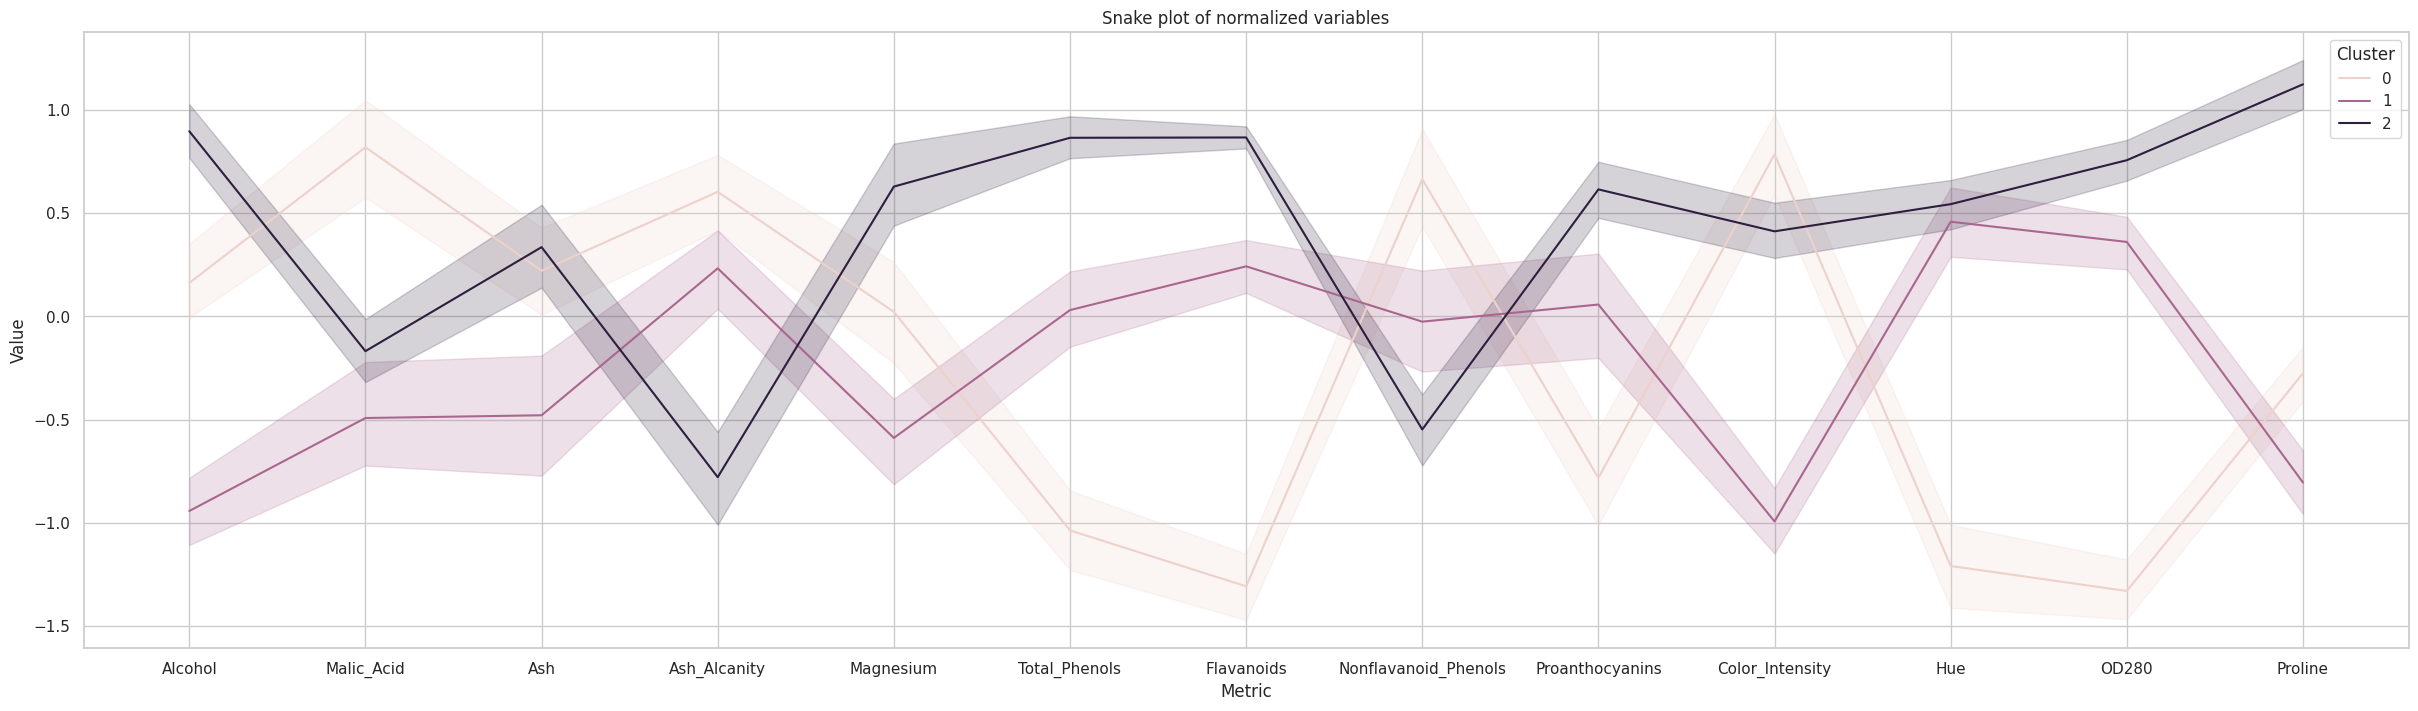

In [35]:
# Assuming datamart_melt is your DataFrame

# Set the size of the figure
fig, ax = plt.subplots(figsize=(30, 8))

# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x-axis label
plt.xlabel('Metric')

# Add the y-axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster', ax=ax)

# Show the plot
plt.show()


Conclusions


>


Cluster 0:
>

* Alcohol: 13.1 (Moderate)
* Magnesium: 98.8 (Moderate)
* Flavanoids: 0.8 (Low)
* Color Intensity: 6.6 (High)
* Proline: 623.9 (Moderate)
>
>


Cluster 1:
>
* Alcohol: 12.2 (Low)
* Magnesium: 91.7 (Low)
* Flavanoids: 2.1 (Moderate)
* Color Intensity: 3.0 (Low)
* Proline: 510.5 (Low)
>
>


Cluster 2:
>

* Alcohol: 13.7 (High)
* Magnesium: 106.2 (High)
* Flavanoids: 3.0 (High)
* Color Intensity: 5.5 (Moderate)
* Proline: 1113.5 (High)
>
>
>


This breakdown provides a clearer view of the characteristics of each cluster in terms of specific features. It appears that Cluster 2 generally has higher values across multiple features, indicating potentially distinct characteristics compared to Clusters 0 and 1.

DBSCAN


DBSCAN is a clustering algorithm that identifies dense regions in data, forming clusters of arbitrary shapes. It works with parameters like epsilon (max distance) and MinPts (minimum points to form a cluster), categorizing points as core, border, or noise. Notably, it handles outliers well without requiring the number of clusters in advance.

We will use nearest neighbors algorithm to calculate epsilon in DBSCAN as it offers a data-driven and adaptive approach for determining the density parameter for getting 3 clusters.

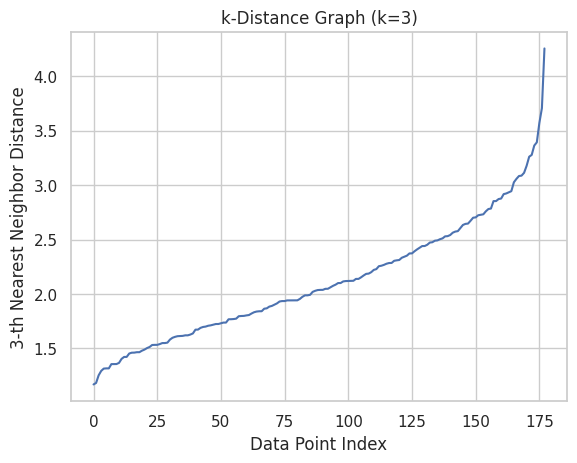

In [39]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

k_value = 3
neigh = NearestNeighbors(n_neighbors=k_value)
neighbors = neigh.fit(datamart_normalized)
distances, indices = neighbors.kneighbors(datamart_normalized)

k_distances = np.sort(distances[:, -1])
plt.plot(np.arange(len(datamart_normalized)), k_distances)
plt.title(f'k-Distance Graph (k={k_value})')
plt.xlabel('Data Point Index')
plt.ylabel(f'{k_value}-th Nearest Neighbor Distance')
plt.show()


We will be using again the Elbow method using a value between 1.5 and 2.0.

In [40]:
datamart_normalized.info

<bound method DataFrame.info of       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.475065   -0.441342  0.315022     -1.272378   2.133976       0.830034   
1    0.274393   -0.348086 -0.867261     -3.332745   0.173744       0.638310   
2    0.225895    0.307515  1.191252     -0.178696   0.255349       0.830034   
3    1.631515   -0.136061  0.579224     -0.811577   1.176079       1.938924   
4    0.322744    0.523678  1.863245      0.575921   1.531166       0.830034   
..        ...         ...       ...           ...        ...            ...   
173  0.880176   -0.239657  0.391277      0.426083  -0.246924      -0.948716   
174  0.514699    1.481062  0.504501      1.141580   0.336150      -0.708476   
175  0.358912    1.691227 -0.359696      0.272545   1.669005      -1.140440   
176  0.238033    0.523678  0.082434      0.272545   1.669005      -1.011459   
177  1.362370    1.591355  1.432010      1.534424  -0.161047      -0.255617   

     Flavanoids  No

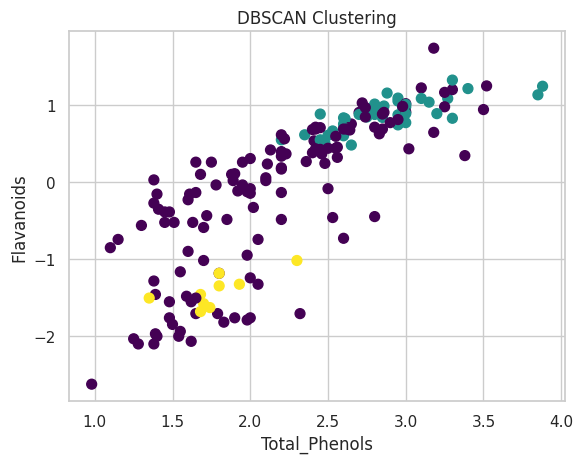

In [41]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
eps = 1.74 # epsilon parameter (maximum distance between two samples for one to be considered as in the neighborhood of the other)
min_samples = 5 # minimum number of samples in a neighborhood for a data point to be considered a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
datamart_normalized['cluster_DBSCAN'] = dbscan.fit_predict(datamart_normalized)

# Visualize the clusters
plt.scatter(wine_df['Total_Phenols'], datamart_normalized['Flavanoids'], c=datamart_normalized['cluster_DBSCAN'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.show()


In [42]:
datamart_normalized['cluster_DBSCAN'].value_counts()

-1    127
 0     42
 1      9
Name: cluster_DBSCAN, dtype: int64

In [50]:
# Extract cluster labels
cluster_labels = dbscan.labels_

# Create a DataFrame by adding a new cluster label column
datamart_wine_k3_dbscan = wine_df.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_wine_k3_dbscan.groupby(['Cluster'])

# Calculate average features values and segment sizes per cluster value
grouped.agg({
    'Alcohol': 'mean',
    'Malic_Acid': 'mean',
    'Ash': 'mean',
    'Ash_Alcanity': 'mean',
    'Magnesium': 'mean',
    'Total_Phenols': 'mean',
    'Flavanoids': 'mean',
    'Nonflavanoid_Phenols': 'mean',
    'Proanthocyanins': 'mean',
    'Color_Intensity': 'mean',
    'Hue': 'mean',
    'OD280': 'mean',
    'Proline': 'mean',

  }).round(1)

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
Cluster                                                                     
-1          12.7         2.4  2.3          19.9       96.4            2.1   
 0          13.8         1.8  2.5          17.3      107.0            2.9   
 1          13.4         3.6  2.4          21.2       91.8            1.8   

         Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
Cluster                                                                       
-1              1.8                   0.4              1.5              4.4   
 0              3.0                   0.3              1.9              5.7   
 1              0.7                   0.5              1.2              8.3   

         Hue  OD280  Proline  
Cluster                       
-1       0.9    2.5    620.0  
 0       1.1    3.2   1153.3  
 1       0.6    1.7    640.6

In [47]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized.reset_index(),

# Assign CustomerID and Cluster as ID variables
                    id_vars=['cluster_DBSCAN'],

# Assign features values as value variables
                    value_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],

# Name the variable and value
                    var_name='Metric', value_name='Value'
					)
print(datamart_melt)


      cluster_DBSCAN   Metric     Value
0                  0  Alcohol  1.475065
1                 -1  Alcohol  0.274393
2                  0  Alcohol  0.225895
3                  0  Alcohol  1.631515
4                 -1  Alcohol  0.322744
...              ...      ...       ...
2309               1  Proline  0.184441
2310               1  Proline  0.216869
2311              -1  Proline  0.476227
2312              -1  Proline  0.490650
2313              -1  Proline -0.488879

[2314 rows x 3 columns]


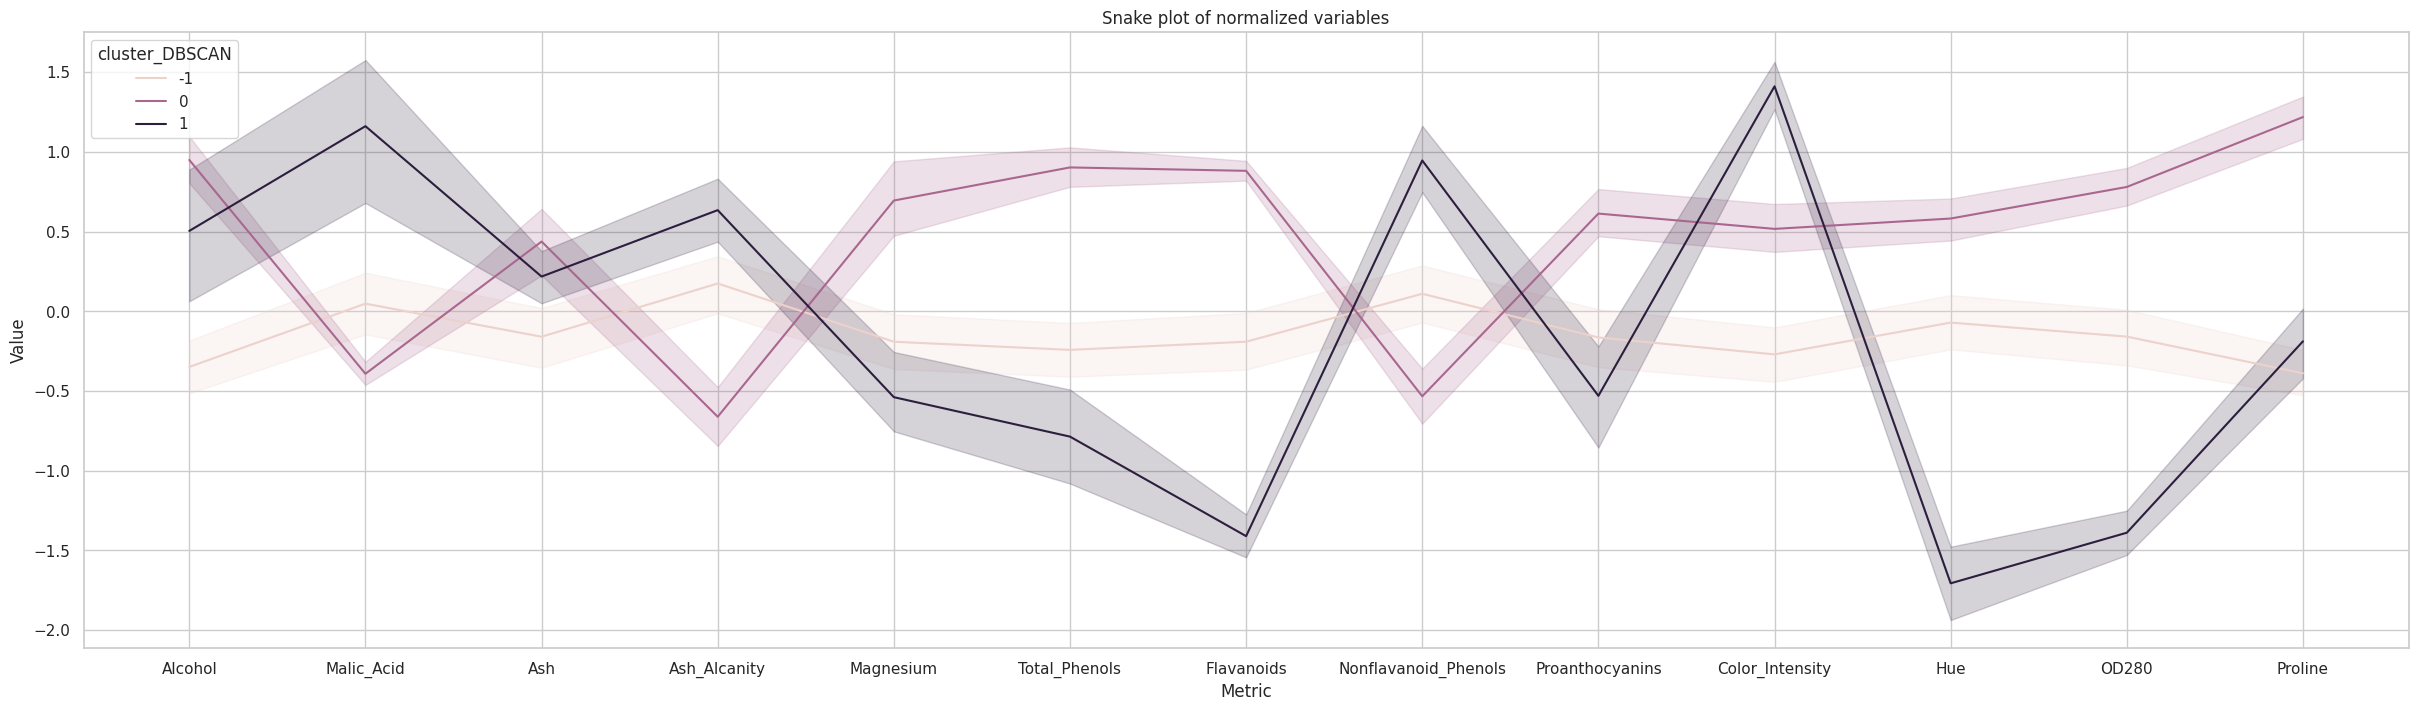

In [49]:
# Assuming datamart_melt is your DataFrame

# Set the size of the figure
fig, ax = plt.subplots(figsize=(30, 8))

# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x-axis label
plt.xlabel('Metric')

# Add the y-axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='cluster_DBSCAN', ax=ax)

# Show the plot
plt.show()

Cluster -1:
>

* Alcohol: Low
* Malic Acid: Medium
* Magnesium: Medium
* Total Phenols: Medium
* Flavanoids: Medium
* Color Intensity: Low


>
>


Cluster 0:
>

* Alcohol: High
* Malic Acid: Medium
* Magnesium: High
* Total Phenols: High
* Flavanoids: High
* Color Intensity: High
>
>

Cluster 1:
>

* Alcohol: Medium
* Malic Acid: High
* Magnesium: Low
* Total Phenols: Low
* Flavanoids: Low
* Color Intensity: High

General overview of cluster Characteristics:

* Cluster 0: Stands out with high alcohol content, rich phenolic composition, elevated magnesium levels, and intense color.
* Cluster -1: Displays moderate values across most features, presenting a balanced and moderate profile.
* Cluster 1: Characterized by moderate alcohol content, lower phenolic composition, lower magnesium levels, and very high color intensity.